# CS464
## Machine Learning - HW2 

# N. Onur VURAL - 21902330
### SEC: 2


# QUESTION 1: PCA & DOGS

In [1]:
# import necessary libraries
import os
from os import listdir
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Converting dog images to 3-D array of size 5239×4096×3

In [2]:
dog_images = np.zeros((5239,4096,3))
index = 0
# resizing images
folder_dir = "afhq_dog"
for image in os.listdir(folder_dir):
    if (image.endswith(".jpg")):
        resizedIm = PIL.Image.open("afhq_dog/"+ image).resize((64,64), Image.BILINEAR)
        #plt.imshow(resizedIm)
        resizedIm = np.array(resizedIm)
        # resizedIm = np.array(resizedIm, dtype = "int32")
        
        # print(resizedIm.shape)
        d1, d2, d3 = resizedIm.shape
        resizedIm = resizedIm.flatten().reshape(d1*d2, d3)
        # print(resizedIm)
        # print(resizedIm.shape) 
        dog_images[index] = resizedIm
        index = index + 1
        
print(dog_images.shape) 

C:\Users\user\AppData\Local\Temp\ipykernel_14200\1957072623.py:7: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  resizedIm = PIL.Image.open("afhq_dog/"+ image).resize((64,64), Image.BILINEAR)


(5239, 4096, 3)


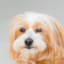

In [3]:
# sample image
image_id = 0
sample_image = (dog_images[image_id]).astype(np.uint8).reshape(64,64,3)
Image.fromarray(sample_image)

# Q1.1: Applying PCA to get first 10 principal components for each image

In [4]:
print(dog_images[:,:,2])
print(dog_images[:,:,2].shape)
#-----------------------------------------------------------------------------------------------
def PCA(channel_data):
    
    # PROCESS 1: Zero centering standardaziton
    avg = np.mean(channel_data, axis=0)
    # print("Mean vector is: ", avg)
    # print("Mean vector size is: ", avg.size)
    channel_data2 = channel_data - avg
    
    # PROCESS 2: Covarience matrix
    covarience_matrix = np.cov(channel_data2, rowvar = False)
    # print(covarience_matrix.shape)
    eig_values, eig_vectors = np.linalg.eig(covarience_matrix)
    # we need eigens in sorted decreasing order
    sorted_order = np.argsort(eig_values)[::-1]
    sorted_eig_values = eig_values[sorted_order]
    sorted_eig_vectors = eig_vectors[:,sorted_order]

    return sorted_eig_values, sorted_eig_vectors # eig_vectors_pc, avg
    

[[184. 184. 184. ...  71.  77.  88.]
 [216. 222. 192. ...  80.  71.  70.]
 [123. 124. 123. ...  44.  42.  36.]
 ...
 [100. 100.  96. ... 141. 141. 116.]
 [ 15.  16.  21. ... 201. 199. 187.]
 [188. 178. 172. ... 165. 175. 169.]]
(5239, 4096)


# Testing for R Channel





First  10  pve's are:  [0.2150681068731377, 0.13542095903812393, 0.0750408239301227, 0.05172646440945615, 0.04228590064660128, 0.024580425792267956, 0.021770322002457612, 0.019896569510316386, 0.01706974941947941, 0.016558493563630355]
Sum of first 10  pve's is:  0.6194178151855935
Sum of ALL pve's is:  0.9999999999999998
Minimum number of PC's to obtain 70% PVE is:  18


Text(0, 0.5, 'Proportion Variance Explained')

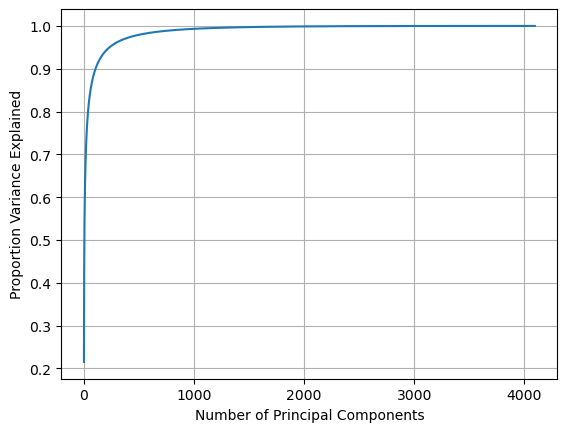

In [5]:
pca_components_num = 10
sorted_eig_values_r, sorted_eig_vectors_r = PCA(dog_images[:,:,0])

# bring k of them as principle components
eig_vectors_pc_r = sorted_eig_vectors_r[:,0:pca_components_num]
eig_values_pc_r = sorted_eig_values_r[0:pca_components_num]

pve = []
for i in range(len(sorted_eig_values_r)):
    pve.append(sorted_eig_values_r[i] / np.sum(sorted_eig_values_r))
# Reporting PVE's, PVE sum, all PVE sum    
print("First ", pca_components_num ," pve's are: ", pve[0:pca_components_num])
print("Sum of first", pca_components_num ," pve's is: ", np.sum(pve[0:pca_components_num]))
print("Sum of ALL pve's is: ", np.sum(pve))

# Finding minimum number of PC's to reach above 70% PVE
sum_so_far = 0
i = 0
while sum_so_far < 0.7 :
    sum_so_far = sum_so_far + pve[i]
    i = i + 1
print("Minimum number of PC's to obtain 70% PVE is: ", i)

plt.grid()
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion Variance Explained')

# Testing for G Channel

First  10  pve's are:  [0.20045373100504224, 0.13767588143152348, 0.07695187885576901, 0.053969649951491054, 0.042918143529197046, 0.02602155770284145, 0.02142609389411923, 0.020812494401399997, 0.017393203864107407, 0.016811114431734317]
Sum of first 10  pve's is:  0.6144337490672251
Sum of ALL pve's is:  0.9999999999999998
Minimum number of PC's to obtain 70% PVE is:  19


Text(0, 0.5, 'Proportion Variance Explained')

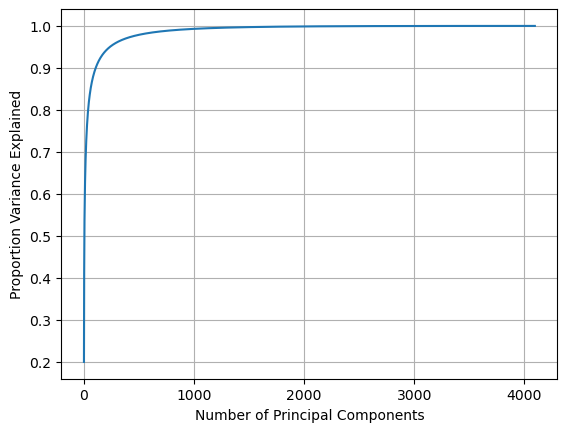

In [6]:
sorted_eig_values_g, sorted_eig_vectors_g = PCA(dog_images[:,:,1])

# bring k of them as principle components
eig_vectors_pc_g = sorted_eig_vectors_g[:,0:pca_components_num]
eig_values_pc_g = sorted_eig_values_g[0:pca_components_num]

pve = []
for i in range(len(sorted_eig_values_g)):
    pve.append(sorted_eig_values_g[i] / np.sum(sorted_eig_values_g))
# Reporting PVE's, PVE sum, all PVE sum    
print("First ", pca_components_num ," pve's are: ", pve[0:pca_components_num])
print("Sum of first", pca_components_num ," pve's is: ", np.sum(pve[0:pca_components_num]))
print("Sum of ALL pve's is: ", np.sum(pve))

# Finding minimum number of PC's to reach above 70% PVE
sum_so_far = 0
i = 0
while sum_so_far < 0.7 :
    sum_so_far = sum_so_far + pve[i]
    i = i + 1
print("Minimum number of PC's to obtain 70% PVE is: ", i)

plt.grid()
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion Variance Explained')




# Testing for B Channel

First  10  pve's are:  [0.2299456213159542, 0.13677010354278865, 0.0703323247123188, 0.05355895002957555, 0.03981729858197309, 0.02373057978965713, 0.02098964613416299, 0.02075654086553708, 0.016680265709240864, 0.016291470910427007]
Sum of first 10  pve's is:  0.6288728015916353
Sum of ALL pve's is:  1.0000000000000002
Minimum number of PC's to obtain 70% PVE is:  17


Text(0, 0.5, 'Proportion Variance Explained')

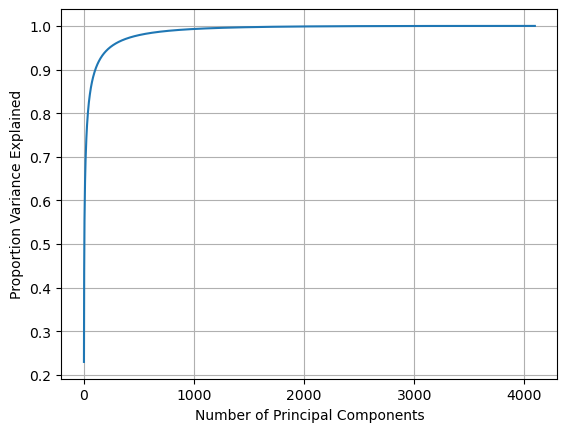

In [7]:
sorted_eig_values_b, sorted_eig_vectors_b = PCA(dog_images[:,:,2])

# bring k of them as principle components
eig_vectors_pc_b = sorted_eig_vectors_b[:,0:pca_components_num]
eig_values_pc_b = sorted_eig_values_b[0:pca_components_num]

pve = []
for i in range(len(sorted_eig_values_b)):
    pve.append(sorted_eig_values_b[i] / np.sum(sorted_eig_values_b))
# Reporting PVE's, PVE sum, all PVE sum    
print("First ", pca_components_num ," pve's are: ", pve[0:pca_components_num])
print("Sum of first", pca_components_num ," pve's is: ", np.sum(pve[0:pca_components_num]))
print("Sum of ALL pve's is: ", np.sum(pve))

# Finding minimum number of PC's to reach above 70% PVE
sum_so_far = 0
i = 0
while sum_so_far < 0.7 :
    sum_so_far = sum_so_far + pve[i]
    i = i + 1
print("Minimum number of PC's to obtain 70% PVE is: ", i)

plt.grid()
plt.plot(np.cumsum(pve))
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion Variance Explained')

# Q1.2: Obtaining RGB images from 10 Principal Components

(10, 64, 64)


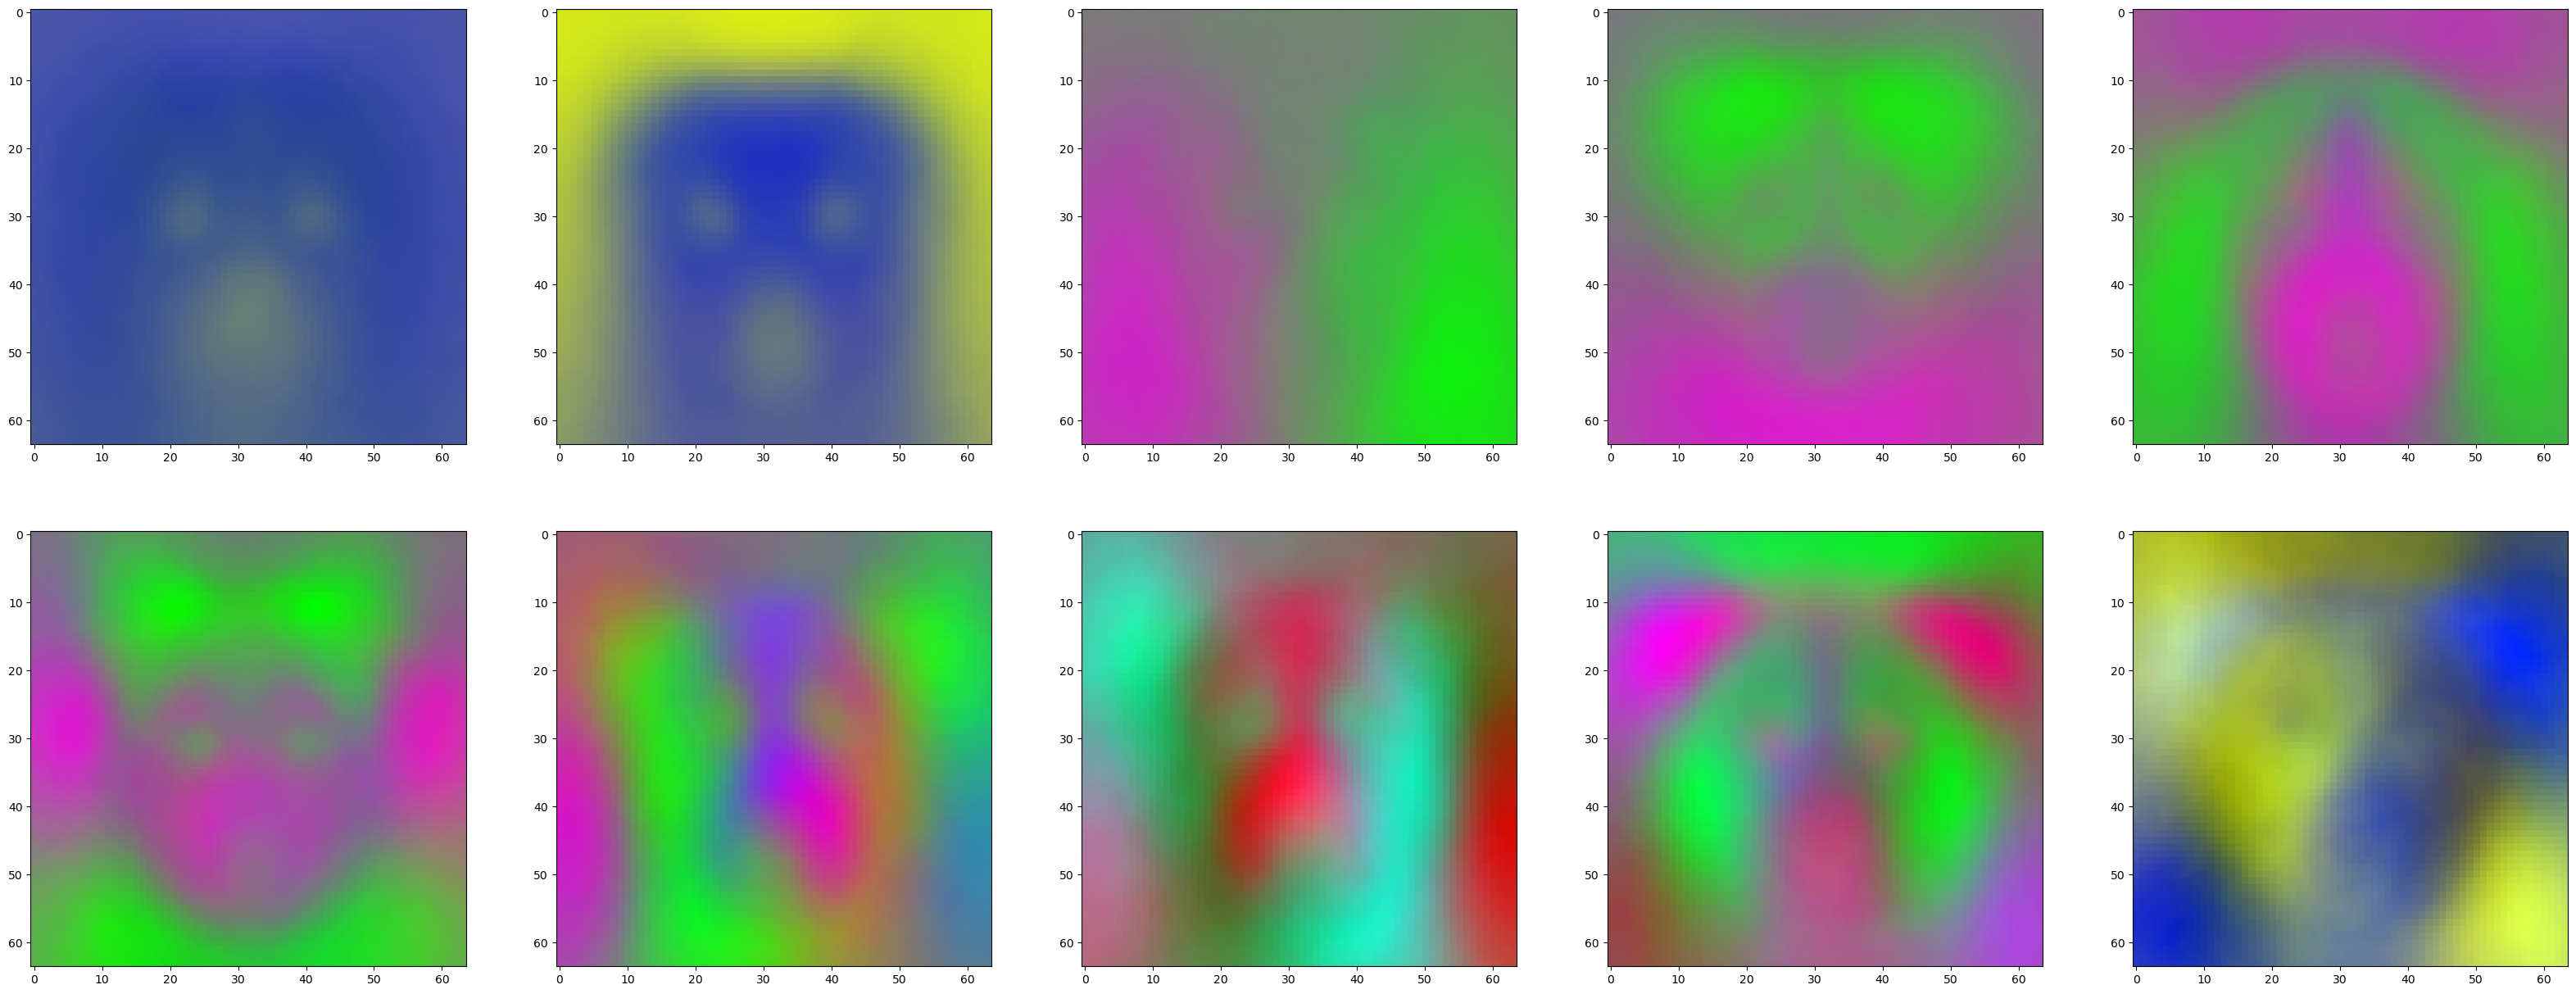

In [8]:
# Reshaping the 10 principal components into 64*64 form
PCMatrices_r = eig_vectors_pc_r.T.reshape(10,64,64)
PCMatrices_g = eig_vectors_pc_g.T.reshape(10,64,64)
PCMatrices_b = eig_vectors_pc_b.T.reshape(10,64,64)

# Normalize values between 0 and 1 by Min-Max Scaling
PCMatrices_r = (PCMatrices_r - PCMatrices_r.min()) / (PCMatrices_r.max() - PCMatrices_r.min())
PCMatrices_g = (PCMatrices_g - PCMatrices_g.min()) / (PCMatrices_g.max() - PCMatrices_g.min())
PCMatrices_b = (PCMatrices_b - PCMatrices_b.min()) / (PCMatrices_b.max() - PCMatrices_b.min())
print(PCMatrices_r.shape)

# obtain 10 RGB images of size 64 × 64 × 3
fig = plt.figure(figsize=[40,40])
for i in range(len(PCMatrices_r)):
    rgb_image = np.dstack((PCMatrices_r[i],PCMatrices_g[i],PCMatrices_b[i]))
    fig.add_subplot(5,5,i+1)
    plt.imshow(rgb_image)
plt.show()    

The results demonstrate that those 10 principal components correspond to eigen vector images. Eigen vector images
are essentially sufficient to represent all images within the dataset with a specific linear combination.

# Q1.3 Reconstructing Original Images with Various Principal Component Values

To reconstruct an original image by using the principal components, 

[[186. 186. 184.]
 [186. 186. 184.]
 [185. 187. 184.]
 ...
 [190. 122.  71.]
 [194. 126.  77.]
 [202. 134.  88.]]


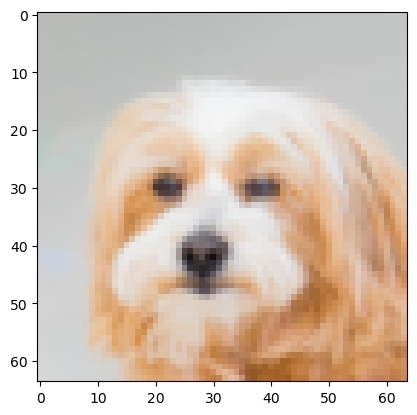

In [9]:
# Reconstruct first image!!!
first_image_compressed = dog_images[0]
print(first_image_compressed)
plt.imshow(first_image_compressed.reshape(64,64,3).astype("uint8"))

# FORMAL RECONSTURCTION PROCESS

FOR K= 1


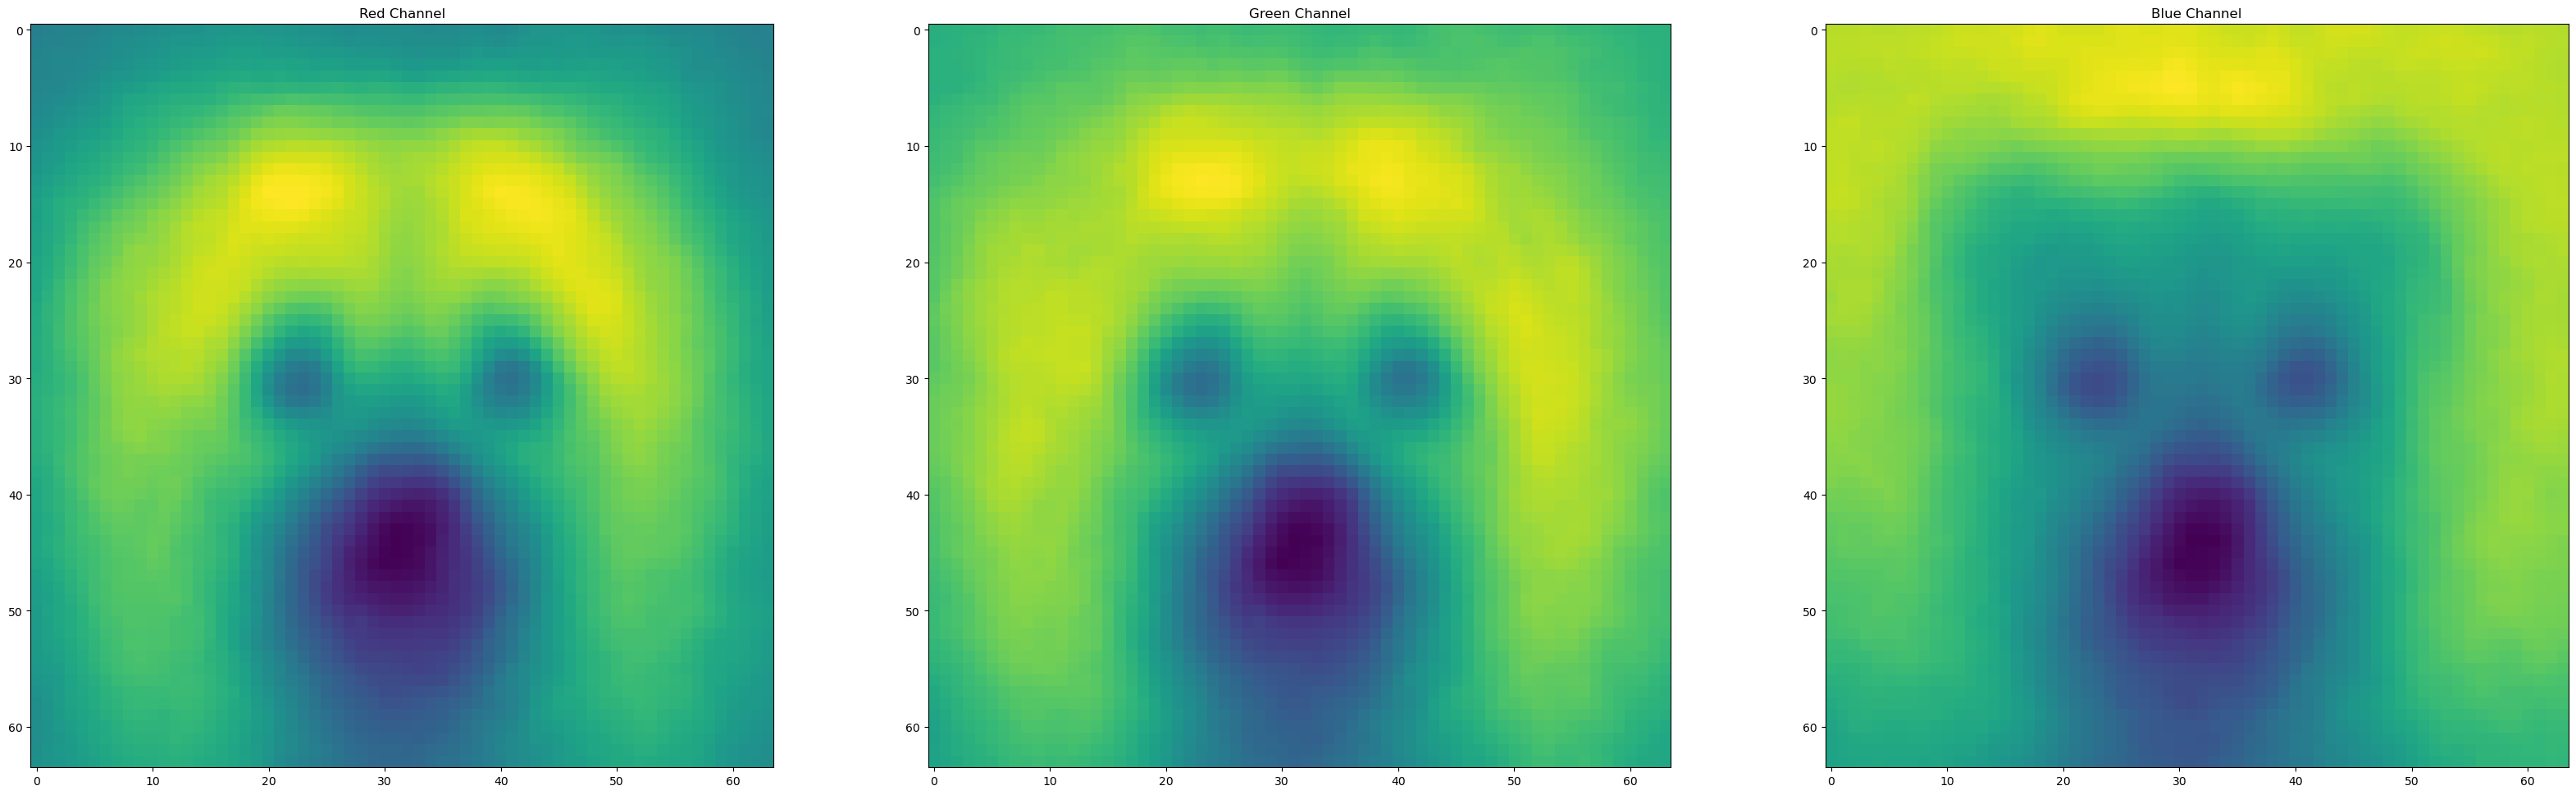

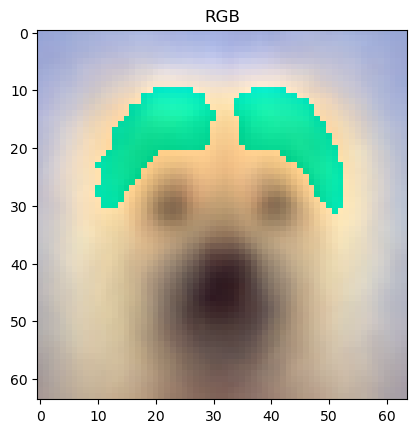

FOR K= 50


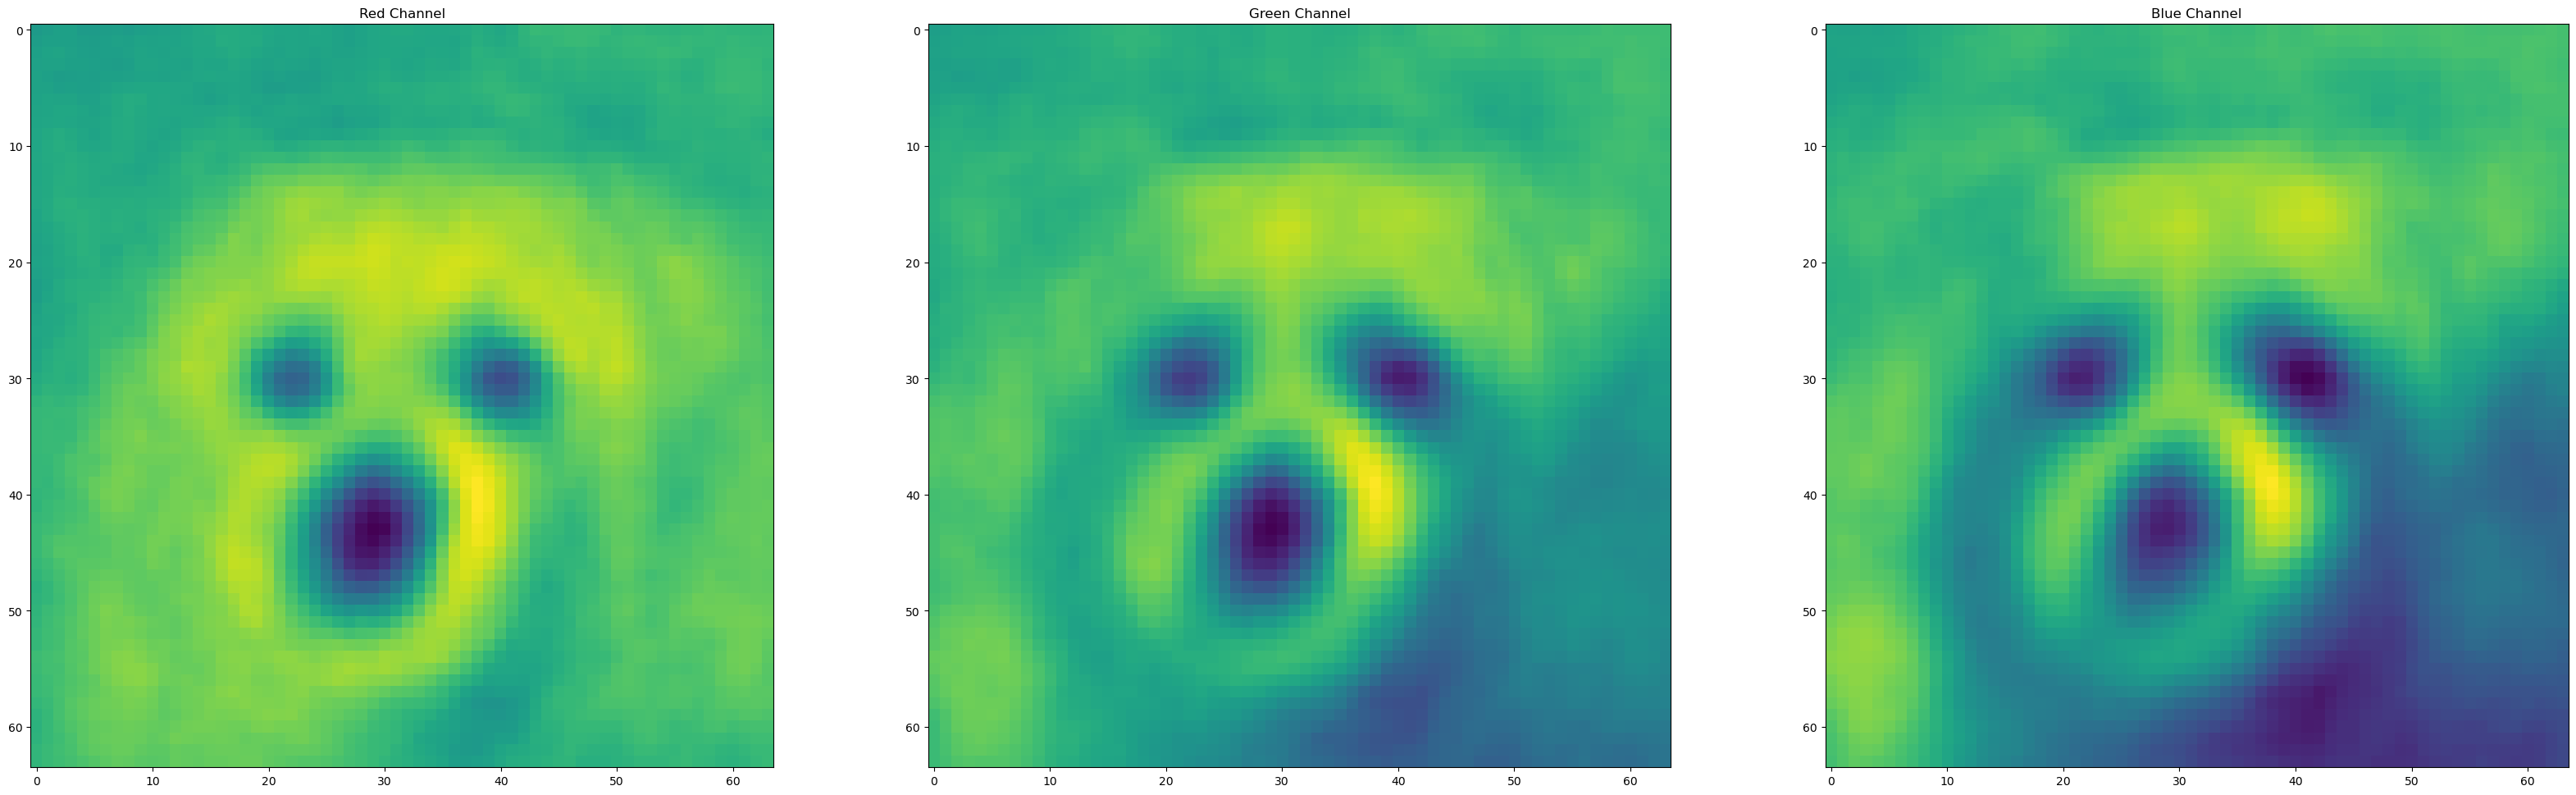

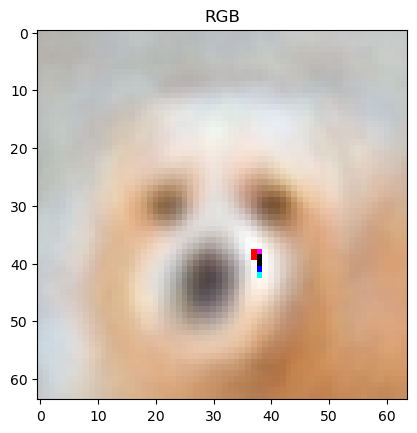

FOR K= 250


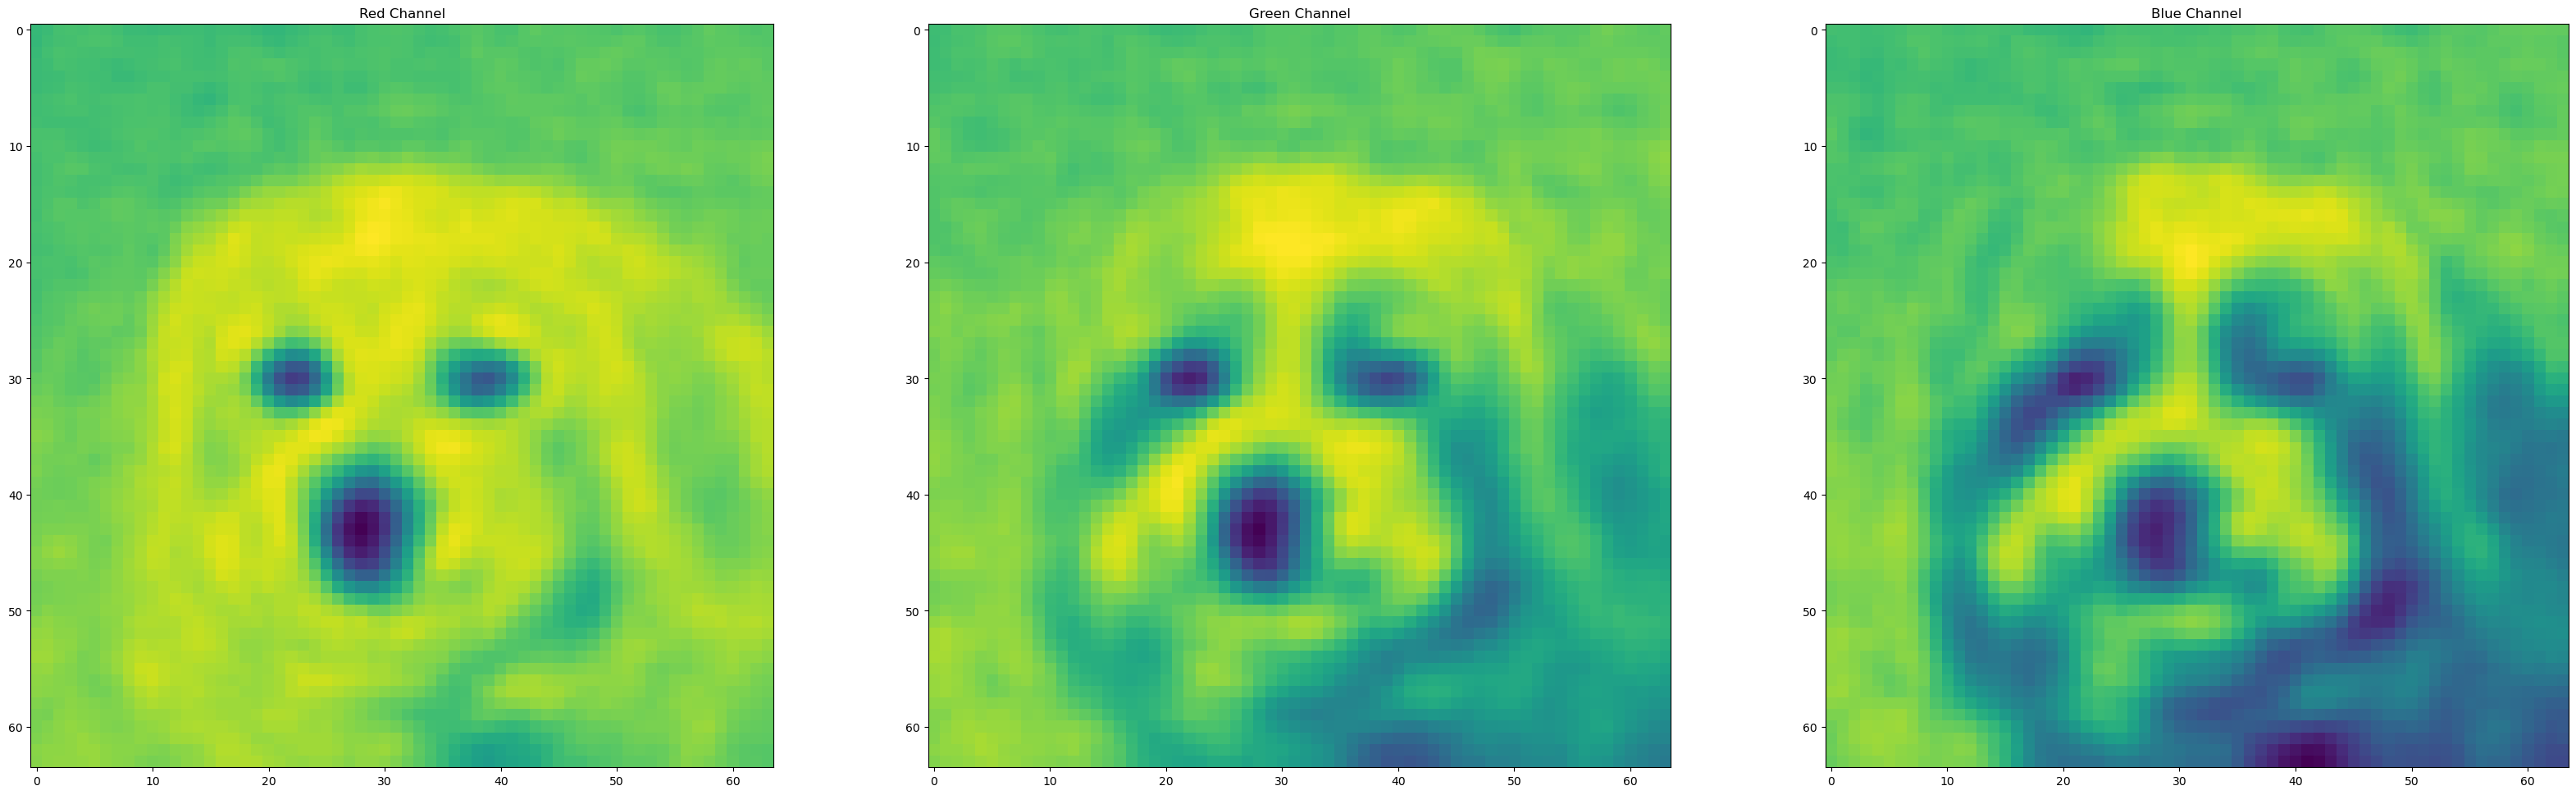

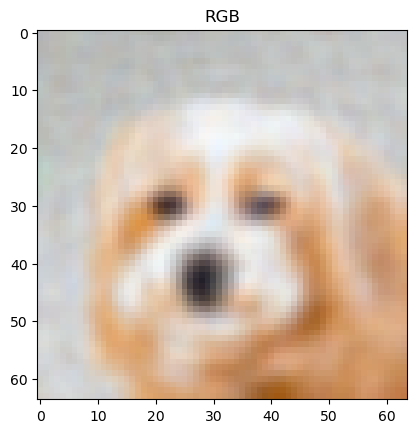

FOR K= 500


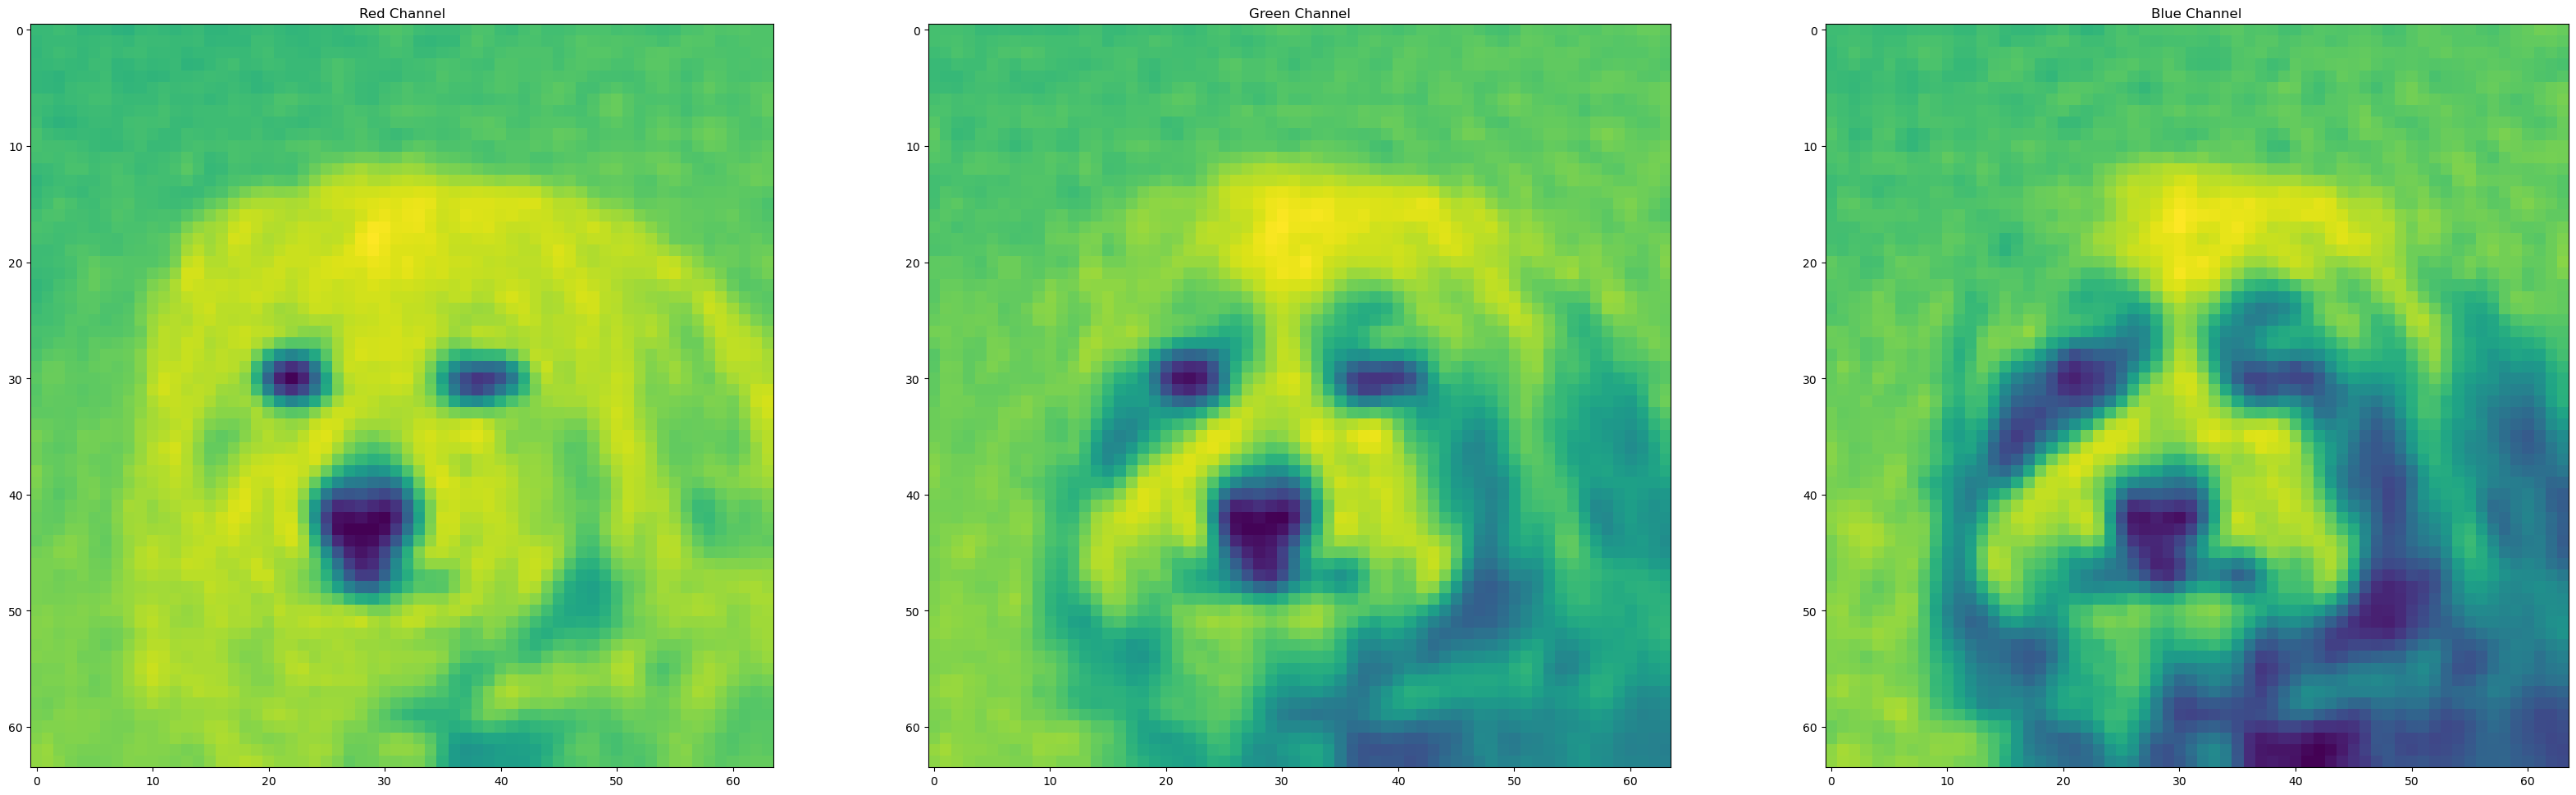

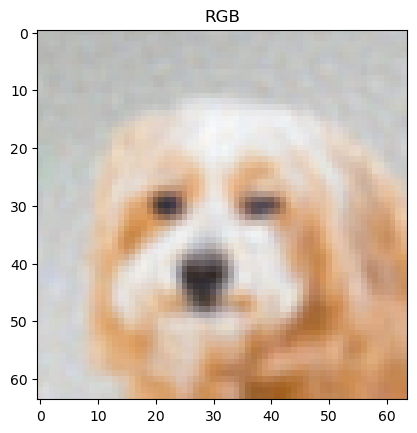

FOR K= 1000


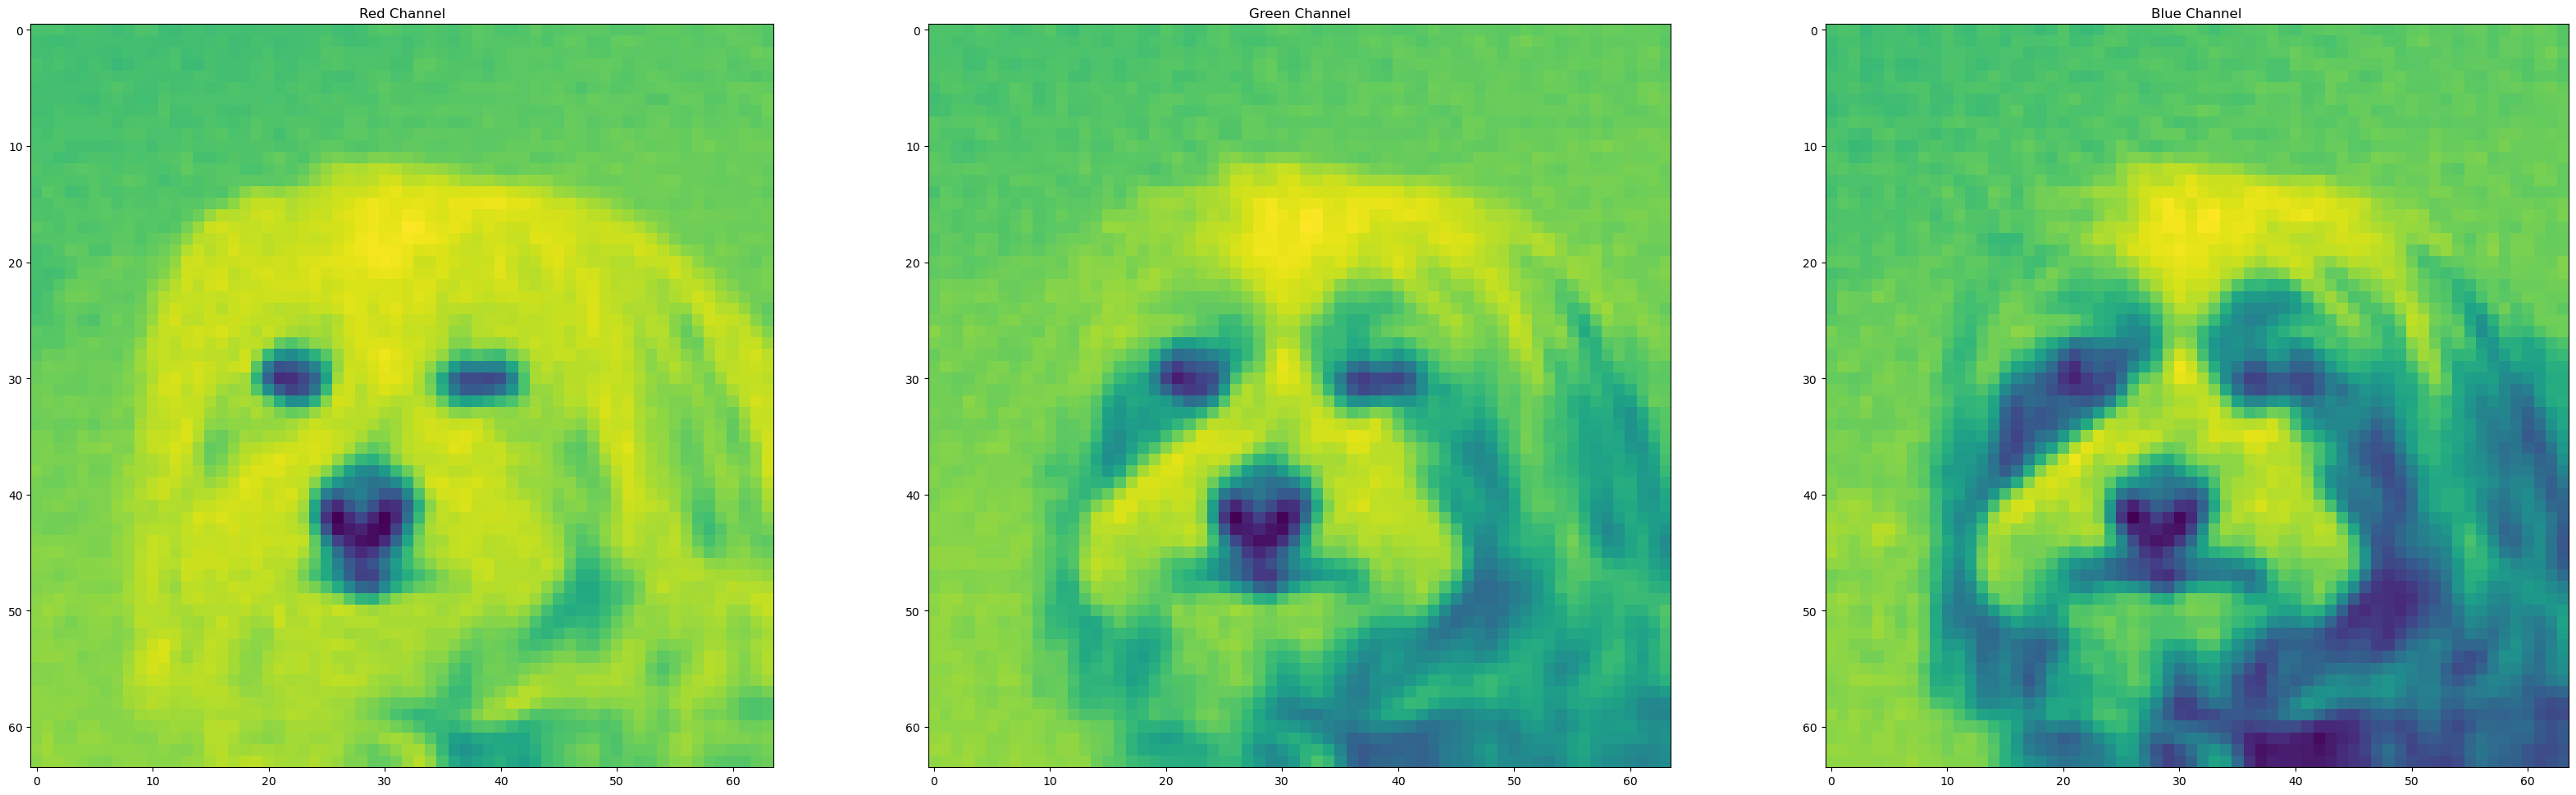

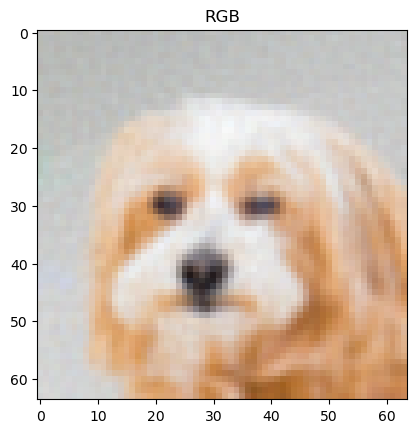

FOR K= 4096


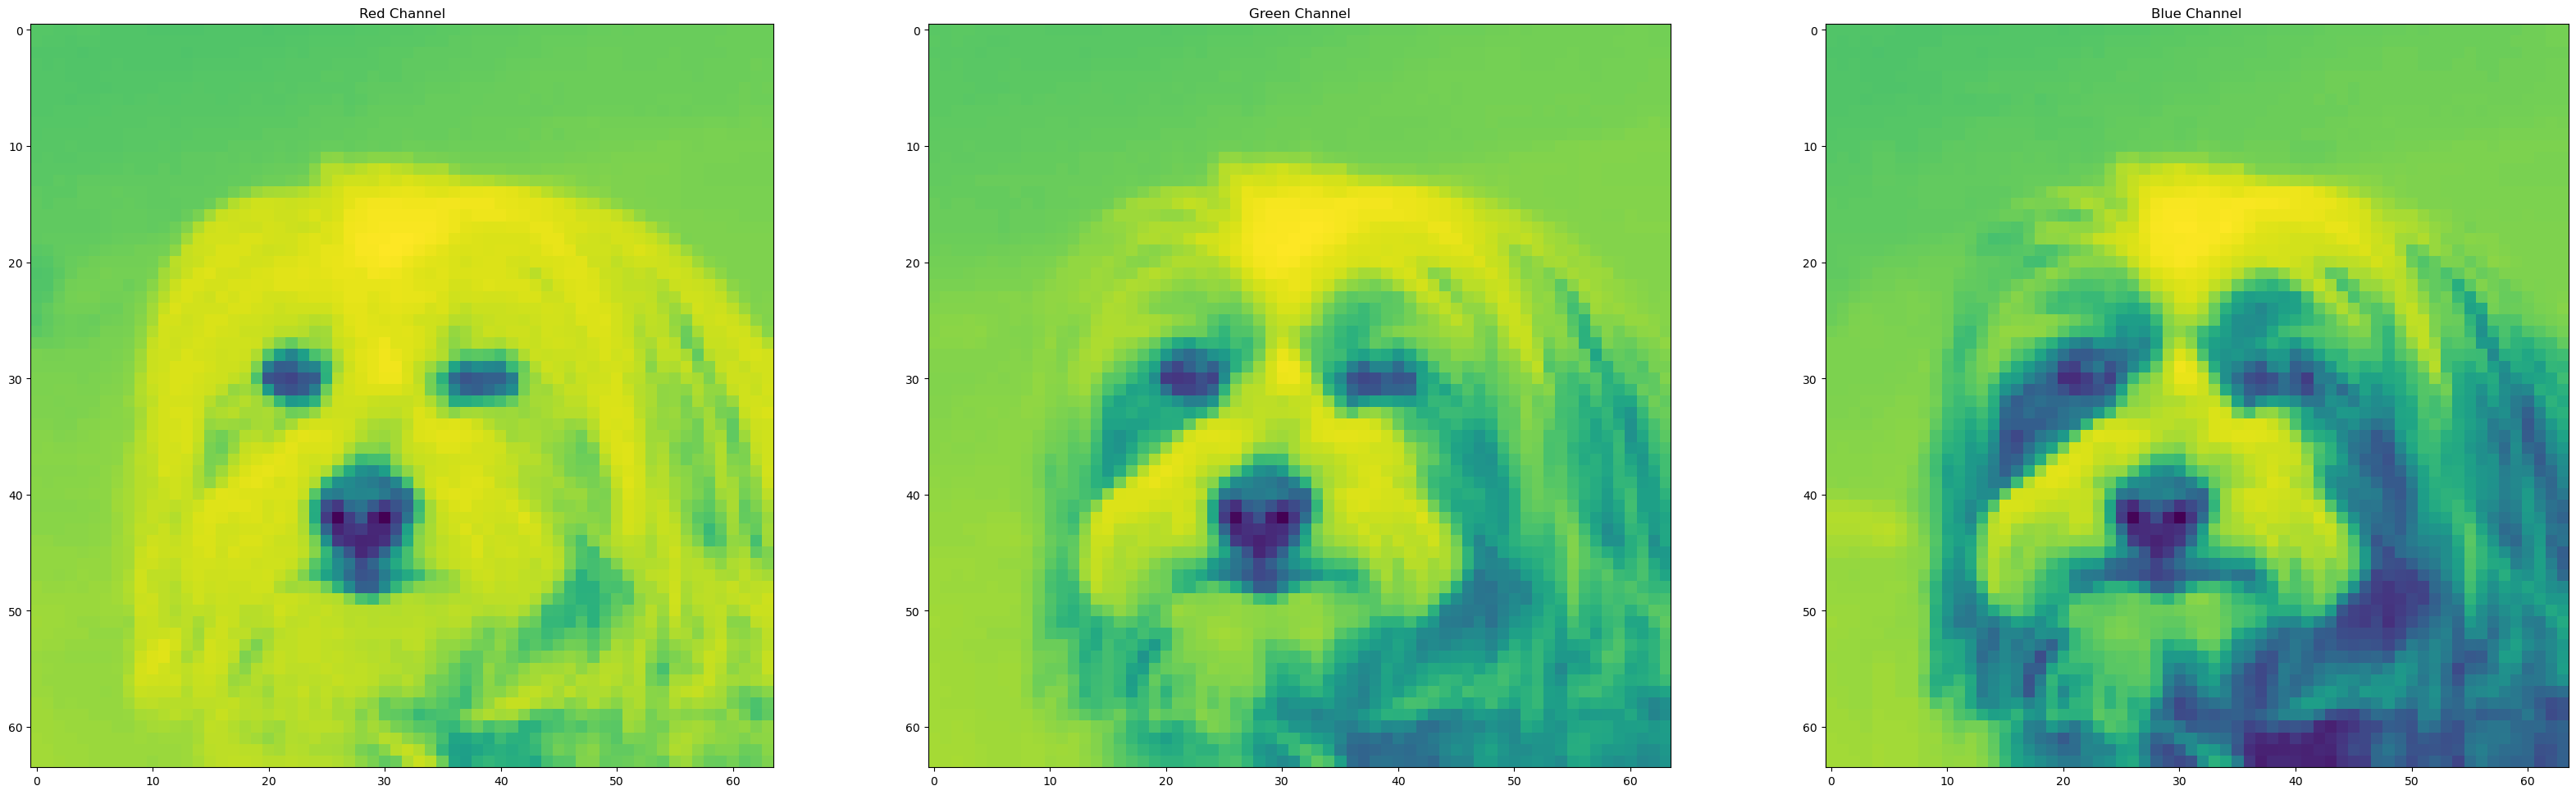

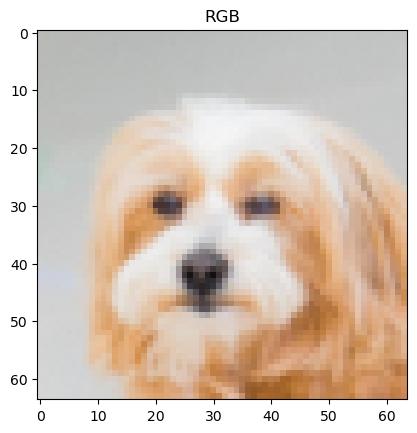

In [10]:
# FORMAL RECONSTRUCTION PROCESS WITH k set!
# split the image into channels
red_channel = first_image_compressed[:, 0]
green_channel = first_image_compressed[:, 1]
blue_channel = first_image_compressed[:, 2]

# define our k set where each k corresponds to number of pc's
k_set = (1, 50, 250, 500, 1000, 4096)

for k in k_set:
    print("FOR K=", k)
    # Bring corresponding k principal components among all PC's
    # bring k of them as principle components
    eig_vectors_pc_r = sorted_eig_vectors_r[:,0:k]
    eig_vectors_pc_g = sorted_eig_vectors_g[:,0:k]
    eig_vectors_pc_b = sorted_eig_vectors_b[:,0:k]
   
    # Reshaping the k principal components into 64*64 form
    PCMatrices_r = eig_vectors_pc_r.T.reshape(k,64,64)
    PCMatrices_g = eig_vectors_pc_g.T.reshape(k,64,64)
    PCMatrices_b = eig_vectors_pc_b.T.reshape(k,64,64)
    
    # TAKING DOT PRODUCT FOR ALL 3 CHANNELS
    dot_product_pc_im_r = np.dot(PCMatrices_r.reshape(k, 4096), red_channel)
    dot_product_pc_im_r = np.matmul(PCMatrices_r.reshape(k, 4096).T, dot_product_pc_im_r)
    
    # for G
    dot_product_pc_im_g = np.dot(PCMatrices_g.reshape(k, 4096), green_channel)
    dot_product_pc_im_g = np.matmul(PCMatrices_g.reshape(k, 4096).T, dot_product_pc_im_g)

    # for B
    dot_product_pc_im_b = np.dot(PCMatrices_b.reshape(k, 4096), blue_channel)
    dot_product_pc_im_b = np.matmul(PCMatrices_b.reshape(k, 4096).T, dot_product_pc_im_b)

    # OBTAIN RGB IMAGE BY COMBINING ALL PROCESSED CHANNELS
    my_rgb_image = np.dstack((dot_product_pc_im_r,dot_product_pc_im_g,dot_product_pc_im_b))
    
    # PRINTING THE RESULTS
    fig = plt.figure(figsize=[40,40])
    fig.add_subplot(3,3,1)
    plt.title("Red Channel")
    plt.imshow(dot_product_pc_im_r.reshape(64,64))
    fig.add_subplot(3,3,2)
    plt.title("Green Channel")
    plt.imshow(dot_product_pc_im_g.reshape(64,64))
    fig.add_subplot(3,3,3)
    plt.title("Blue Channel")
    plt.imshow(dot_product_pc_im_b.reshape(64,64))
    plt.show()
    
    plt.title("RGB")
    plt.imshow(my_rgb_image.reshape(64,64,3).astype("uint8"))
    plt.show()    
  

As the results demonstrate, increasing the number of principal components contribute to a more true representation of the given image. This was expected since the original image is obtained by using linear combination of our principal components. The higher number of principal components increases the accuracy rate of reconstruction. 